# Fitting a sine wave 


In [3]:
# import packages, set random seed

# import packages, set random seed
random_seed = 36

import random
random.seed(random_seed)
import numpy as np
np.random.seed(random_seed)
import tensorflow as tf
tf.random.set_seed(random_seed)
import matplotlib.pyplot as plt
import matplotlib as mpl

# set random seed
np.random.seed(int(random_seed))
tf.random.set_seed(int(random_seed))

# nice figures
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.dpi']= 150
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Helvetica']
mpl.rcParams['font.size'] = 12


AttributeError: module 'tensorflow' has no attribute 'random'

## Make data
First we make the data to fit, Nsamples between -1 and 1 for input, and sin(x) as output

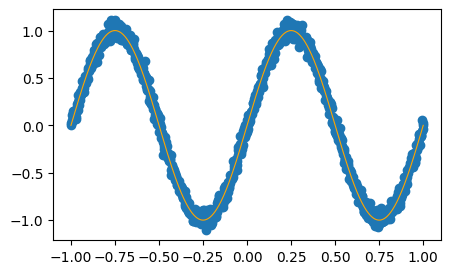

In [ ]:
Nsamples = 1000
np.random.seed(int(random_seed))
xdata = np.linspace(-1,1,Nsamples)
ydata = np.sin(2*np.pi*xdata)+np.random.normal(0,0.02,Nsamples)
sine = np.sin(2*np.pi*xdata)

plt.figure(figsize=(5,3))
plt.scatter(xdata,ydata)
plt.plot(xdata,sine,color='orange',linewidth=0.8)
plt.show()

## Set some neural network parameters
Here we define parts of the neural network architecture and hyper-parameters

In [12]:
lr = 0.01  #learning rate
batch_size = 32
n_epochs = 60 #number of training epochs
activation = 'relu' #activation function on hidden layers
hiddens = [128,128] #hidden layers e.g. [5,8] is two hiddens layers the first with 5 nodes and the second with 8 nodes
loss = 'mse' #loss function

## Make and train the model

In [13]:
#the model takes in input xtrain, ytrain and is evaluated using xval yval during training
#xtrain,ytrain,xval,yval must be numpy arrays of dimension (n_samples,)


nhiddens = len(hiddens)

model = tf.keras.models.Sequential()

# First hidden layer
model.add(tf.keras.layers.Dense(hiddens[0], activation=activation, input_shape=(1,),
                bias_initializer=tf.keras.initializers.RandomNormal(seed=random_seed),
                kernel_initializer=tf.keras.initializers.RandomNormal(seed=random_seed),
                ))

# and the rest of the layers
for ilayer in range(1,nhiddens):
    model.add(tf.keras.layers.Dense(hiddens[ilayer], activation=activation,
                    bias_initializer=tf.keras.initializers.RandomNormal(seed=random_seed),
                    kernel_initializer=tf.keras.initializers.RandomNormal(seed=random_seed),
                    )) 

# final layer
model.add(tf.keras.layers.Dense(1,activation='linear',
                bias_initializer=tf.keras.initializers.RandomNormal(seed=random_seed),
                kernel_initializer=tf.keras.initializers.RandomNormal(seed=random_seed),))


model.compile(optimizer=tf.keras.optimizers.Adam(lr),  # optimizer
            loss=loss,   # loss function   
            metrics=['mae','mse']) 

history = model.fit(xtrain, ytrain, epochs=n_epochs, batch_size=batch_size, validation_data=(xval, yval), 
                shuffle=True, verbose=0)

#The training and validation losses hystory are saved in the variable history.
#You can use history.history['loss'] to plot the training loss and history.history['val_loss'], 
#to plot the validation loss
#To evaluate the model you can use ypred = model.predict(xtest), the predictions are saved 
#in the variable y_pred

AttributeError: module 'tensorflow' has no attribute 'keras'